In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/fertilizers-by-product-fao/FertilizersProduct.csv', encoding='ISO-8859-1')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164468 entries, 0 to 164467
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area Code     164468 non-null  int64  
 1   Area          164468 non-null  object 
 2   Item Code     164468 non-null  int64  
 3   Item          164468 non-null  object 
 4   Element Code  164468 non-null  int64  
 5   Element       164468 non-null  object 
 6   Year Code     164468 non-null  int64  
 7   Year          164468 non-null  int64  
 8   Unit          164468 non-null  object 
 9   Value         164468 non-null  float64
 10  Flag          164468 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 13.8+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,164468.0,129.207493,73.530215,1.0,66.00,126.000,196.0000,276.00
Item Code,164468.0,4014.222098,9.014672,4001.0,4006.00,4014.000,4022.0000,4030.00
Element Code,164468.0,5663.300387,211.588558,5157.0,5610.00,5622.000,5910.0000,5922.00
Year Code,164468.0,2009.734125,4.542937,2002.0,2006.00,2010.000,2014.0000,2017.00
Year,164468.0,2009.734125,4.542937,2002.0,2006.00,2010.000,2014.0000,2017.00
Value,164468.0,94603.142236,691019.482586,-1043.0,45.53,989.165,15028.1125,49046666.67


In [ ]:
df.drop(['Year Code'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Area Code,0
Area,0
Item Code,0
Item,0
Element Code,0
Element,0
Year,0
Unit,0
Value,0
Flag,0


In [ ]:
df['Item'].value_counts()

,count
Item,
Urea,10491
NPK fertilizers,10145
Ammonium sulphate,9054
"Other nitrogenous fertilizers, n.e.c.",8950
Potassium chloride (muriate of potash) (MOP),8851
Fertilizers n.e.c.,8786
Ammonium nitrate (AN),8738
Other NP compounds,8500
Diammonium phosphate (DAP),7807


In [ ]:
df['Area'].value_counts()

,count
Area,
Brazil,1779
Slovenia,1626
Denmark,1621
United States of America,1592
Sweden,1575
...,...
Tonga,238
Eritrea,184
Central African Republic,164


In [ ]:
df['Element'].value_counts()

,count
Element,
Import Quantity,45709
Import Value,45666
Export Quantity,25452
Export Value,25425
Agricultural Use,14528
Production,7688


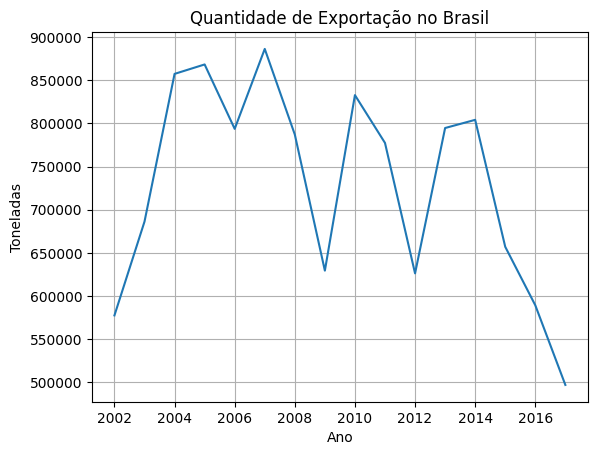

In [ ]:
brasil = df[(df['Area'] == 'Brazil') & (df['Element'] == 'Export Quantity')]
brasil_grouped = brasil.groupby('Year')['Value'].sum().reset_index()

plt.plot(brasil_grouped['Year'], brasil_grouped['Value'])
plt.title('Quantidade de Exportação no Brasil')
plt.xlabel('Ano')
plt.ylabel('Toneladas')
plt.grid(True)
plt.show()

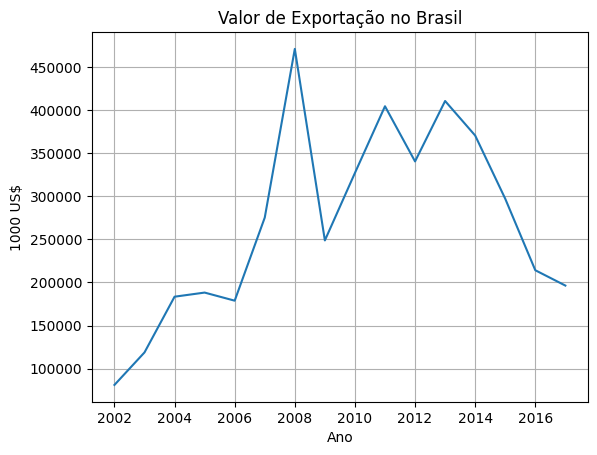

In [ ]:
brasil = df[(df['Area'] == 'Brazil') & (df['Element'] == 'Export Value')]
brasil_grouped = brasil.groupby('Year')['Value'].sum().reset_index()

plt.plot(brasil_grouped['Year'], brasil_grouped['Value'])
plt.title('Valor de Exportação no Brasil')
plt.xlabel('Ano')
plt.ylabel('1000 US$')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Top 10 consumidores de fertilizantes em 2017'}, xlabel='Area'>

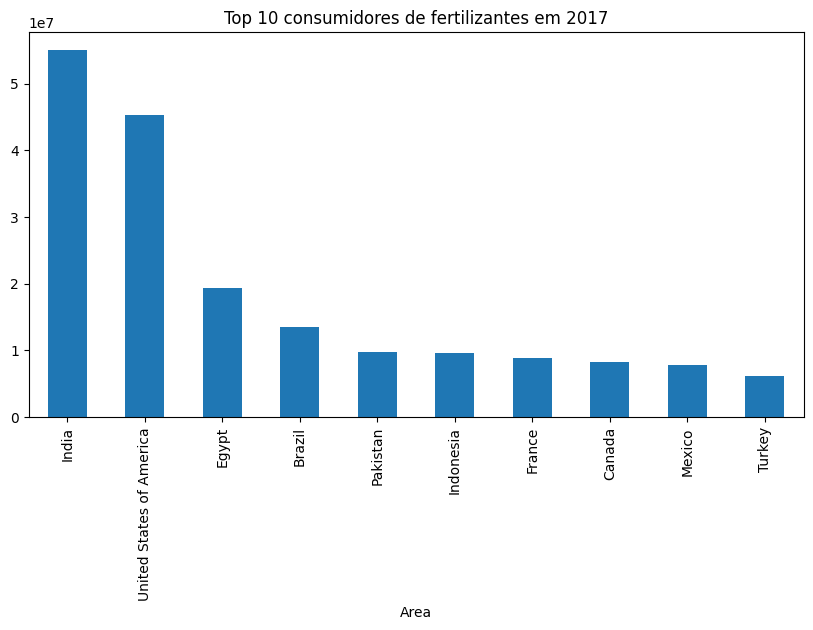

In [ ]:
ano = 2017
top10 = df[(df['Year'] == ano) & (df['Element'] == 'Agricultural Use')]

top10_grouped = top10.groupby('Area')['Value'].sum().sort_values(ascending=False).head(10)

top10_grouped.plot(kind='bar', figsize=(10,5), title=f'Top 10 consumidores de fertilizantes em {ano}')

<Axes: title={'center': 'Top 5 fertilizantes produzidos globalmente'}, ylabel='Item'>

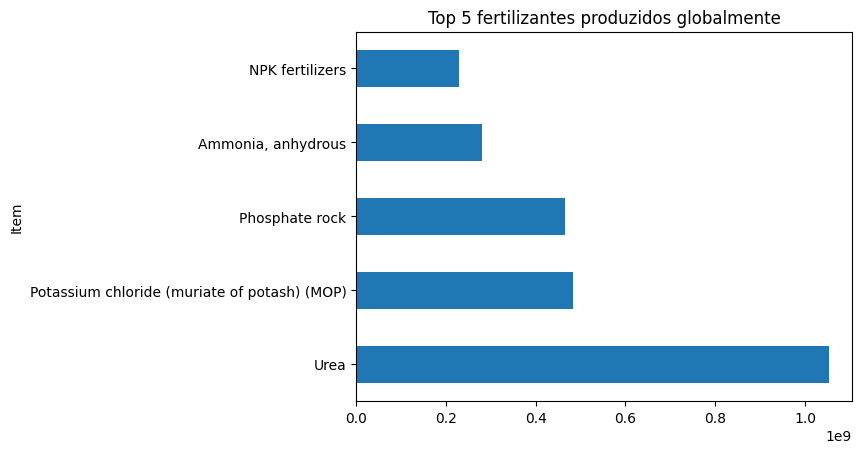

In [ ]:
prod = df[df['Element'] == 'Production']
prod_grouped = prod.groupby('Item')['Value'].sum().sort_values(ascending=False).head(5)

prod_grouped.plot(kind='barh', title='Top 5 fertilizantes produzidos globalmente')

In [ ]:
mapa = df[(df['Element'] == 'Agricultural Use') & (df['Year'] == 2017)]
mapa_grouped = mapa.groupby('Area')['Value'].sum().reset_index()

fig = px.choropleth(mapa_grouped, locations='Area',
                    locationmode='country names',
                    color='Value',
                    title='Consumo de Fertilizantes por País (2017)',
                    color_continuous_scale='YlGnBu')
fig.show()